In [ ]:
#OpenCV는 자체적으로 딥러닝 가중치 모델을 생성하지 않고 타 Framework에서 생성된 모델을 변환하여 로딩함.
#DNN패키지는 파일로 생성된 타 프레임워크를 로딩할 수 있도록 readNetFromXXX(가중치 모델파일, 환경파일) API 제공
# cvNet = Cv2.dnn.readNetFromTensorflow(가중치 모델 파일, 환경파일)

#Opencv DNN을 이용한 Inference 수행 절차
1) 가중치 모델 파일과 환경 설정 파일을 로드하여 Inference 네트워크 모델 생성


cvNet = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb', 'graph.pbtxt')


img = cv2.imread('img.jpg')


rows, cols, channels = img.shape

--

2) 입력 이미지를 preprocessing하여 네트워크에 입력


cvNet.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))


*여기에서 blobFromImage()는 Image Preprocessing을 수행하여 네트워크에 입력할 수 있게 제공한다.

1. 이미지 사이즈 고정

2. 이미지 값 스케일링

3. BGR을 RGB로 변경, 이미지를 Crop할 수 있는 옵션 제공

--


3) Inference 네트워크에서 Output 추출


networkOutput = cvNet.forward()

--


4) 추출된 Output에서 detect 정보를 기반으로 원본 Image 위에 Object Detection 시각화


for detection in networkOutput[0, 0]:


#OpenCV Video Stream Capture을 이용한 Video Object Detection


Open CV의 VideoCapture() API를 이용하여 Video Stream을 Frame by Frame별로 capture한 이미지에 Object Detection을 수행하는 방식


input_video = cv2.VideoCapture(input_file_path)

- while(True) : frame별로 object detection 수행

In [4]:
!mkdir /content/beatle
!wget -o /content/beatle/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

img shape: (633, 806, 3)


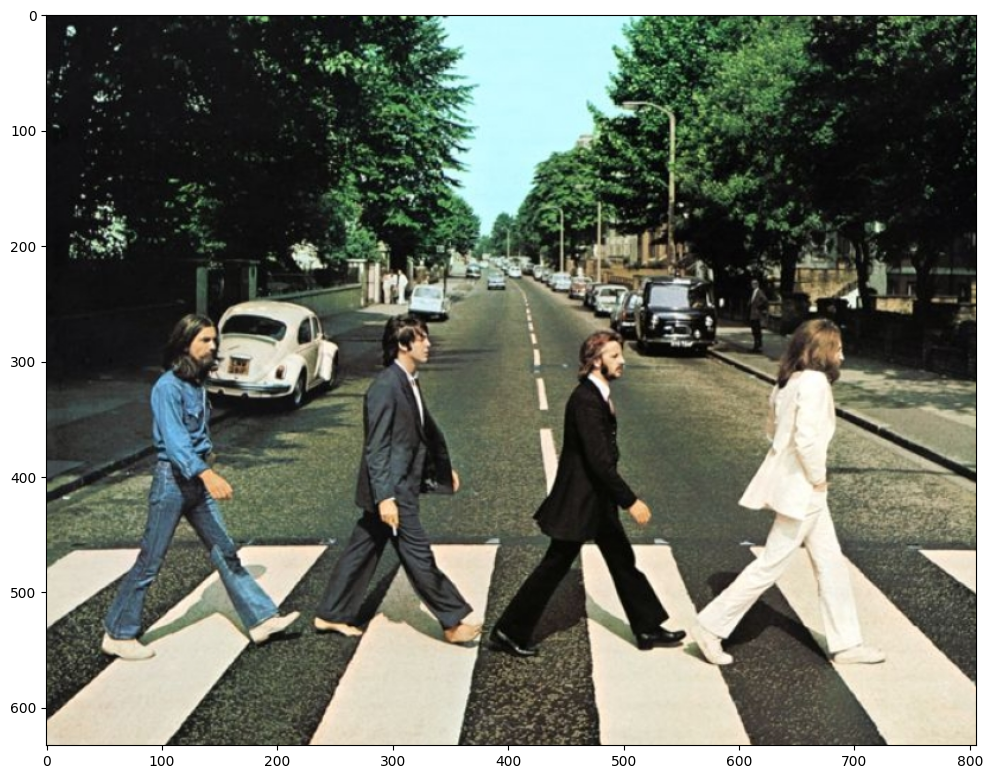

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('img shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [1]:
!mkdir ./pretrained
!wget -o ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -o ./pretrained/config_graph.pbtext https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

In [2]:
!tar -xvf /content/faster_rcnn_resnet50_coco_2018_01_28.tar.gz -C /content/pretrained #-C를 하면 경로를 지정할 수 있다.

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [7]:
#dnn에서 readNetFromTensorflow로 tensorflow inference 모델을 로딩

cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                       '/content/faster_rcnn_resnet50_coco_2018_01_28.pbtxt')

In [8]:
#coco 데이터셋의 클래스 ID별 클래스명 지정
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush'}

In [9]:
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

In [10]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

#이미지를 Preprocessing하여 Network에 입력하고 Object Detection 수행 후 결과를 이미지에 시각화

(1, 1, 100, 7)
person: 0.999781
person: 0.999588
person: 0.999259
person: 0.996989
person: 0.899451
car: 0.892165
car: 0.760227
car: 0.741497
car: 0.692949
car: 0.691804
car: 0.689624
car: 0.671736
car: 0.652132
car: 0.573045
car: 0.567916
car: 0.526121
car: 0.501187


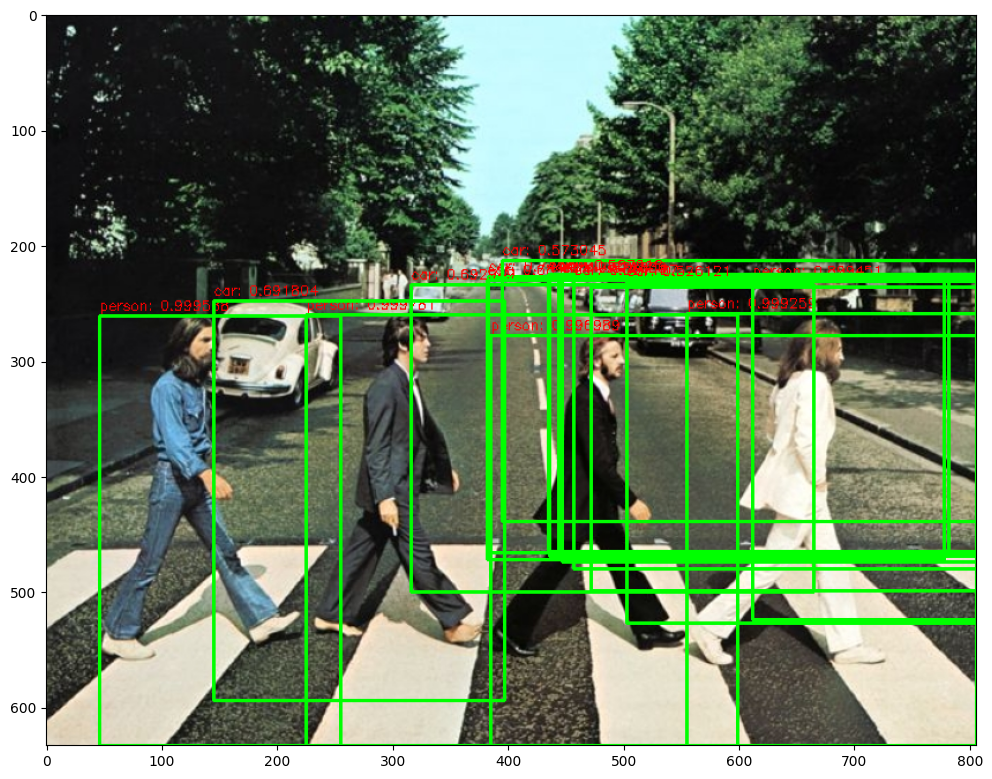

In [11]:
#원본 이미지가 Faster RCNN기반 네트워크로 입력되면 resize됨
#scaling된 이미지 기반으로 bounding box 위치가 예측되기 때문에 이를 다시 원복하기 위해 원본이미지 shape 정보가 필요함

rows = img.shape[0]
cols = img.shape[1]

draw_img = img.copy() #이미지를 그림 그릴 때만 사용

cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))

#Object Detection을 수행하고 결과를 cvOut으로 반환
cv_out = cv_net.forward()
print(cv_out.shape)

#bounding box의 테두리와 글자색 지정
green_color=(0, 255, 0)
red_color = (0, 0, 255)

for detection in cv_out[0, 0, :, :]: #[_, _, object detect한 것, object에 대한 정보(좌표, confidence score 등)]
  score = float(detection[2]) #Condfidence Score
  class_id = int(detection[1]) #Class ID
  if score > 0.5: #score이 0.5가 넘는 object만 추출
    left = detection[3] * cols
    top = detection[4] * rows
    right = detection[5] * cols
    bottom = detection[6] * rows

    caption = "{}: {:4f}".format(labels_to_names_0[class_id], score)
    print(caption)

    cv2.rectangle(draw_img, (int(left), int(top), int(right), int(bottom)), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12, 12))
plt.imshow(img_rgb)

In [12]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):

    rows = img_array.shape[0]
    cols = img_array.shape[1]

    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))

    start = time.time()
    cv_out = cv_net.forward()

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])

        if score > score_threshold:

            left = detection[3] * cols #원본 이미지 배율로 계산하기 위해 곱해줌
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows

            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            print(caption)

            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

In [14]:
!wget -O /content/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=True

--2023-10-02 11:37:52--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=True
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2023-10-02 11:37:53--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2023-10-02 11:37:53--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.

In [15]:
video_input_path = "/content/John_Wick_small.mp4"

capture = cv2.VideoCapture(video_input_path)
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print("Frame 개수:", frame_count)

Frame 개수: 58


In [16]:
video_output_path = "/content/John_Wick_small_cv01.mp4"

capture = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID') #video writer을 어떤 코덱으로 할 것인지 결정.

vid_size = (round(capture.get(cv2.CAP_PROP_FRAME_WIDTH)), round(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = capture.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) #입력하고 동일하게 write

frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print("총 frame 개수:", frame_count)

총 frame 개수: 58


In [17]:
green_color = (0, 255, 0)
red_color = (0, 0, 255)

while True:

  hasFrame, img_frame = capture.read() #만약 더 읽을 frame이 없으면 hasFrame은 False가 나옴.
  if not hasFrame:
    print('frame 다 처리함.')
    break

  rows = img_frame.shape[0]
  cols = img_frame.shape[1]

  cv_net.setInput(cv2.dnn.blobFromImage(img_frame,  swapRB=True, crop=False))

  start= time.time()
  # Object Detection 수행하여 결과를 cv_out으로 반환
  cv_out = cv_net.forward()
  frame_index = 0

  for detection in cv_out[0,0,:,:]:
      score = float(detection[2])
      class_id = int(detection[1])

      if score > 0.5:

          left = detection[3] * cols
          top = detection[4] * rows
          right = detection[5] * cols
          bottom = detection[6] * rows

          caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)


          cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
          cv2.putText(img_frame, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
  print('Detection 수행 시간:', round(time.time()-start, 2),'초')
  vid_writer.write(img_frame) #여기에서 비디오 write.
# end of while loop

vid_writer.release()
capture.release()

Detection 수행 시간: 5.16 초
Detection 수행 시간: 7.36 초
Detection 수행 시간: 5.2 초
Detection 수행 시간: 7.54 초
Detection 수행 시간: 6.78 초
Detection 수행 시간: 7.08 초
Detection 수행 시간: 6.11 초
Detection 수행 시간: 7.79 초
Detection 수행 시간: 6.51 초
Detection 수행 시간: 5.98 초
Detection 수행 시간: 4.91 초
Detection 수행 시간: 5.32 초
Detection 수행 시간: 5.4 초
Detection 수행 시간: 4.82 초
Detection 수행 시간: 5.91 초
Detection 수행 시간: 4.82 초
Detection 수행 시간: 5.7 초
Detection 수행 시간: 5.01 초
Detection 수행 시간: 4.77 초
Detection 수행 시간: 5.7 초
Detection 수행 시간: 4.72 초
Detection 수행 시간: 5.65 초
Detection 수행 시간: 4.78 초
Detection 수행 시간: 4.7 초
Detection 수행 시간: 5.64 초
Detection 수행 시간: 4.71 초
Detection 수행 시간: 5.61 초
Detection 수행 시간: 4.71 초
Detection 수행 시간: 4.71 초
Detection 수행 시간: 5.68 초
Detection 수행 시간: 4.72 초
Detection 수행 시간: 5.51 초
Detection 수행 시간: 4.83 초
Detection 수행 시간: 4.67 초
Detection 수행 시간: 6.94 초
Detection 수행 시간: 4.68 초
Detection 수행 시간: 5.34 초
Detection 수행 시간: 4.98 초
Detection 수행 시간: 4.65 초
Detection 수행 시간: 5.67 초
Detection 수행 시간: 4.68 초
Detection 수행 시간: 5.2 